In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('float_format', '{:f}'.format)

In [3]:
plt.rc("font", family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)

# 데이터 불러오기

In [4]:
squad_e = pd.read_csv("pubg/squad_E.csv")
squad_m = pd.read_csv("pubg/squad_M.csv")

# 데이터 전처리

## player_name 의 null값 제거

In [5]:
squad_e = squad_e[squad_e['player_name'].notnull()]
squad_m = squad_m[squad_m['player_name'].notnull()]

In [6]:
squad_e_df = squad_e.copy()
squad_m_df = squad_m.copy()

## outlier 처리

- 'game_size'           >> 게임 최대 크기의 80% 

- 'player_name'         >> null값 제거

- 'player_dbno'         >> 11 이하
- 'player_dmg'          >> 3000 dmg
- 'player_kills'        >> 30 kill

- 'player_dist_ride'    >> 30km
- 'player_dist_walk'    >> 10km?
- 'player_survive_time' >> 최대 1700

- 'killed_by'           >> 
- 'killer_placement'    >> 
- 'killer_position_x'   >> 킬 거리 400 이하
- 'killer_position_y'   >> 
- 'time'                >> 최대 1700 > 1900
- 'victim_name'         >> 
- 'victim_placement'    >> 
- 'victim_position_x'   >> 
- 'victim_position_y'   >> 

### 쓸 데 없는 컬럼 제거

In [7]:
squad_e_df = squad_e_df[['date', 'game_size', 'match_id', 'party_size',
       'player_assists', 'player_dbno', 'player_dist_ride', 'player_dist_walk',
       'player_dmg', 'player_kills', 'player_name', 'player_survive_time',
       'team_id', 'team_placement', 'killed_by', 'killer_placement',
       'killer_position_x', 'killer_position_y', 'map', 'time', 'victim_name',
       'victim_placement', 'victim_position_x', 'victim_position_y']]

In [8]:
squad_m_df = squad_m_df[['date', 'game_size', 'match_id', 'party_size',
       'player_assists', 'player_dbno', 'player_dist_ride', 'player_dist_walk',
       'player_dmg', 'player_kills', 'player_name', 'player_survive_time',
       'team_id', 'team_placement', 'killed_by', 'killer_placement',
       'killer_position_x', 'killer_position_y', 'map', 'time', 'victim_name',
       'victim_placement', 'victim_position_x', 'victim_position_y']]

### game_size 정리
- party_size별 최대 크기의 80%이상 되는 크기만 남길 것.

In [9]:
squad_e_df = squad_e_df[squad_e_df['game_size'] >= 20]
squad_m_df = squad_m_df[squad_m_df['game_size'] >= 20]

In [10]:
squad_e_df['game_size'].value_counts()

27    11504040
28     9382981
26     6347317
29     3719334
25     1956664
30      926284
24      712418
23      452705
22      324224
21      224685
20      162948
31      162853
32       29872
33        5138
34         986
35         294
Name: game_size, dtype: int64

### player_dmg 정리
- 3000 이하의 damage

In [11]:
squad_e_df = squad_e_df.loc[squad_e_df['player_dmg'] <= 3000]
squad_m_df = squad_m_df.loc[squad_m_df['player_dmg'] <= 3000]

### player_kills 정리

In [12]:
squad_e_df = squad_e_df.loc[squad_e_df['player_kills'] <= 30]
squad_m_df = squad_m_df.loc[squad_m_df['player_kills'] <= 30]

### player_dbno 정리

In [13]:
squad_e_df = squad_e_df.loc[squad_e_df['player_dbno'] <= 11]
squad_m_df = squad_m_df.loc[squad_m_df['player_dbno'] <= 11]

### player_survive_time 정리
- time 이 player_survive_time 보다 큰 경우 존재. 이야기 해 볼 것.

In [14]:
squad_e_df = squad_e_df.loc[squad_e_df['player_survive_time'] <= 1900]
squad_m_df = squad_m_df.loc[squad_m_df['player_survive_time'] <= 1900]

In [15]:
squad_e_df.loc[squad_e_df['time'] > 1900, ['time','player_survive_time']] 

,time,player_survive_time
123136,1902.000000,1884.997000
185453,1902.000000,1878.935000
209583,1931.000000,1888.676000
275110,1907.000000,1897.571000
368353,1935.000000,1874.541000
...,...,...
35909200,1921.000000,1885.768000
35958140,1938.000000,1884.850000
35970291,1910.000000,1879.573000
35987125,1902.000000,1860.178000


In [16]:
squad_e_df = squad_e_df.reset_index(drop=True)
squad_m_df = squad_m_df.reset_index(drop=True)

### kill_distance 정리
- 여기에서 killer/victim 관련 null값이 다 날라간다? 어떻게?

In [17]:
squad_e_df['kill_distance'] = np.sqrt(((squad_e_df['killer_position_x'] - squad_e_df['victim_position_x']) ** 2) 
                                      + ((squad_e_df['killer_position_y'] - squad_e_df['victim_position_y']) ** 2))
squad_m_df['kill_distance'] = np.sqrt(((squad_m_df['killer_position_x'] - squad_m_df['victim_position_x']) ** 2) 
                                      + ((squad_m_df['killer_position_y'] - squad_m_df['victim_position_y']) ** 2))

In [18]:
squad_e_df = squad_e_df.drop(squad_e_df.loc[squad_e_df['kill_distance'] > 400000].index)
squad_m_df = squad_m_df.drop(squad_m_df.loc[squad_m_df['kill_distance'] > 400000].index)

#### 참(True)인 값을 버리는 것 과 틀린(False) 값을 버리는 것의 차이가 크다.
- nan값은 숫자와 비교하면 대소구분 모두 False이기 때문에, 거짓인 값을 버리면 nan값도 같이 버려짐.
- 만약 nan값을 살리고 싶으면, 꼭 참(True)인 값을 버릴 것.

### player_dist_ 정리

In [19]:
squad_e_df = squad_e_df[squad_e_df['player_dist_walk'] <= 1000000]
squad_e_df = squad_e_df[squad_e_df['player_dist_ride'] <= 3000000]
squad_m_df = squad_m_df[squad_m_df['player_dist_walk'] <= 1000000]
squad_m_df = squad_m_df[squad_m_df['player_dist_ride'] <= 3000000]

In [20]:
squad_e_df = squad_e_df.reset_index(drop=True)
squad_m_df = squad_m_df.reset_index(drop=True)

In [21]:
squad_e_df.isnull().sum()

date                          0
game_size                     0
match_id                      0
party_size                    0
player_assists                0
player_dbno                   0
player_dist_ride              0
player_dist_walk              0
player_dmg                    0
player_kills                  0
player_name                   0
player_survive_time           0
team_id                       0
team_placement                0
killed_by              14222848
killer_placement       14222848
killer_position_x      14222848
killer_position_y      14222848
map                           0
time                   14222848
victim_name            14222848
victim_placement       14222848
victim_position_x      14222848
victim_position_y      14222848
kill_distance          14222848
dtype: int64

# match 수 10판 이상인 사람만 추출

In [22]:
match_count = squad_e_df.groupby('player_name')['match_id'].nunique().reset_index()
match_count.columns = ['player_name', 'playtime']
squad_e_df = pd.merge(squad_e_df, match_count, how='left', on='player_name')
squad_e_df = squad_e_df.loc[squad_e_df['playtime'] >= 10]

In [23]:
match_count = squad_m_df.groupby('player_name')['match_id'].nunique().reset_index()
match_count.columns = ['player_name', 'playtime']
squad_m_df = pd.merge(squad_m_df, match_count, how='left', on='player_name')
squad_m_df = squad_m_df.loc[squad_m_df['playtime'] >= 10]

# MIRAMAR & ERANGEL _ CONCAT

In [24]:
squad_df = pd.concat([squad_e_df,squad_m_df], ignore_index=True)

In [25]:
squad_df.isnull().sum()

date                         0
game_size                    0
match_id                     0
party_size                   0
player_assists               0
player_dbno                  0
player_dist_ride             0
player_dist_walk             0
player_dmg                   0
player_kills                 0
player_name                  0
player_survive_time          0
team_id                      0
team_placement               0
killed_by              8383203
killer_placement       8383203
killer_position_x      8383203
killer_position_y      8383203
map                          0
time                   8383203
victim_name            8383203
victim_placement       8383203
victim_position_x      8383203
victim_position_y      8383203
kill_distance          8383203
playtime                     0
dtype: int64

In [27]:
squad_df['game_size'].sort_values()

8427026     20
5169870     20
5169869     20
5169868     20
5169867     20
            ..
20422376    36
20422377    36
20422378    36
20422368    36
20422374    36
Name: game_size, Length: 20426962, dtype: int64

In [29]:
squad_df.loc[squad_df['game_size'] == 36, 'match_id'].nunique() / squad_df['match_id'].nunique()

6.027455057788225e-06

# 배그 RP 공식 적용
- (29 - 'team_placement') * 0.5 + 'player_kills' * 2 + 'player_assist' * 2

## scoring column 생성
- (29 - 'team_placement') * 0.5 
- 'team_placement' * 1
- game_size.max() - team_placement

In [30]:
squad_df['pubg_scoring'] = (36 - squad_df['team_placement']) * 1 + squad_df['player_kills'] * 2 + squad_df['player_assists'] * 2

## pubg_rp  DataFrame 생성

In [31]:
pubg_rp = squad_df.groupby(['player_name','match_id'])['pubg_scoring'].first().reset_index()
pubg_rp.head()

,player_name,match_id,pubg_scoring
0,0--kxxk--0,2U4GBNA0Ymk0jRTjC0OgtzXHPY_wqiClwksSiN9QA4pqvD...,34
1,0--kxxk--0,2U4GBNA0Ymk38ILdnFoIWOUVmjnK92G5_DMemnKEVKQnF9...,26
2,0--kxxk--0,2U4GBNA0Ymk38zTiZlvey3_LcNgXOkz1ughyBrg_5CbJ4W...,22
3,0--kxxk--0,2U4GBNA0YmkORyQTZFNT4_hOZRNa-9GPDKI4geLCpL9s8B...,12
4,0--kxxk--0,2U4GBNA0YmkOfSRsjDi_hcufNnH5Y0O9_1D_OasdAf1oVi...,26


In [32]:
# 랭크 점수 합
rp_sum = pubg_rp.groupby(['player_name'])['pubg_scoring'].sum().reset_index()

In [33]:
rp_sum.columns = ['player_name', 'score_sum']

In [34]:
rp_sum.sort_values('score_sum')

,player_name,score_sum
147248,GorillaPoop,84
429870,carriage6,91
580450,youyouxkn,99
591753,zzzz--y,100
407902,Zeldavoxxx,102
...,...,...
477709,jimmy0572,17281
178650,JZalan,19791
326428,Slh_Bunny,21933
469970,hzxiaobin,23418


In [35]:
rp_sum.loc[rp_sum['score_sum'] > 1500, 'player_name'].count()

30315

<AxesSubplot:>

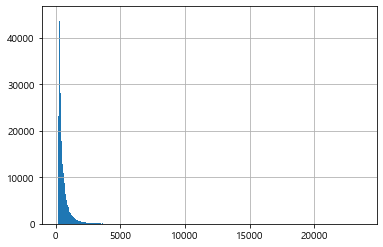

In [36]:
rp_sum['score_sum'].hist(bins=1000)

<AxesSubplot:>

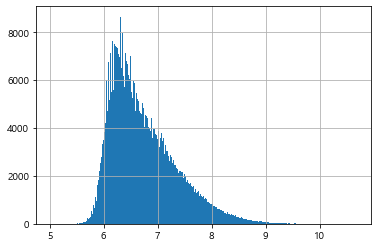

In [55]:
(np.log(rp_sum['score_sum'])+0.6).hist(bins=400)

# KDA

In [38]:
# 플레이어 별 1등을 한 횟수 체크
player_placement_df = squad_df[['player_name', 'match_id','team_placement']]
winner = player_placement_df.groupby(['player_name', 'match_id'])['team_placement'].first().reset_index()
winner_count = winner[winner['team_placement'] == 1]
chicken = winner_count.groupby('player_name')['team_placement'].count()
chicken_count = chicken.reset_index()
chicken_count.columns = ['player_name', 'chicken']
chicken_count

,player_name,chicken
0,0-0_00_000_0_-0,2
1,0-AK-47-0,1
2,0-ASTAR-0,1
3,0-Korey-0,1
4,0-Liyahao,5
...,...,...
233338,zzzzzzzzllll,1
233339,zzzzzzzzzz-zhen,1
233340,zzzzzzzzzzsc,4
233341,zzzzzzzzzzzaaaa,1


In [39]:
# 플레이어 별 킬/어시스트 합계
killassi = squad_df[['player_name', 'match_id', 'player_kills', 'player_assists']]
killassi_count = killassi.groupby(['player_name', 'match_id'])[['player_kills', 'player_assists']].first().reset_index()
killassi_sum = killassi_count.groupby('player_name')[['player_kills', 'player_assists']].sum().reset_index()
killassi_sum.columns = ['player_name', 'kills_sum', 'assists_sum']
killassi_sum

,player_name,kills_sum,assists_sum
0,0--kxxk--0,16,9
1,0-0-Bram,40,15
2,0-0Tiger,14,8
3,0-0_00_000_0_-0,50,25
4,0-0_Zyjkiller,5,3
...,...,...,...
591860,zzzzzzzzzzzaaaa,18,8
591861,zzzzzzzzzzzzB,15,6
591862,zzzzzzzzzzzzz1,51,17
591863,zzzzzzzzzzzzzg,18,11


In [40]:
# 플레이어 별 경기수(데스로 쓸 것) 체크
death = player_placement_df.groupby('player_name')['match_id'].nunique().reset_index()
death

,player_name,match_id
0,0--kxxk--0,44
1,0-0-Bram,45
2,0-0Tiger,32
3,0-0_00_000_0_-0,44
4,0-0_Zyjkiller,10
...,...,...
591860,zzzzzzzzzzzaaaa,23
591861,zzzzzzzzzzzzB,14
591862,zzzzzzzzzzzzz1,56
591863,zzzzzzzzzzzzzg,23


In [41]:
# kda 계산
kda_ka = killassi_sum.merge(death, how='left', on='player_name')
kda = kda_ka.merge(chicken_count, how='left', on='player_name')
kda.columns = ['player_name', 'kills_sum', 'assists_sum', 'death_sum', 'chicken']
kda['chicken'] = kda['chicken'].fillna(0)
kda['kda'] = (kda['kills_sum'] + kda['assists_sum']) / (kda['death_sum'] - kda['chicken'])
kda

,player_name,kills_sum,assists_sum,death_sum,chicken,kda
0,0--kxxk--0,16,9,44,0.000000,0.568182
1,0-0-Bram,40,15,45,0.000000,1.222222
2,0-0Tiger,14,8,32,0.000000,0.687500
3,0-0_00_000_0_-0,50,25,44,2.000000,1.785714
4,0-0_Zyjkiller,5,3,10,0.000000,0.800000
...,...,...,...,...,...,...
591860,zzzzzzzzzzzaaaa,18,8,23,1.000000,1.181818
591861,zzzzzzzzzzzzB,15,6,14,0.000000,1.500000
591862,zzzzzzzzzzzzz1,51,17,56,2.000000,1.259259
591863,zzzzzzzzzzzzzg,18,11,23,0.000000,1.260870


In [42]:
kda.sort_values('kda')

kda_final = kda[['player_name', 'kda']]

In [43]:
squad_df = squad_df.merge(kda_final, how='left', on='player_name')

In [44]:
squad_df.columns

Index(['date', 'game_size', 'match_id', 'party_size', 'player_assists',
       'player_dbno', 'player_dist_ride', 'player_dist_walk', 'player_dmg',
       'player_kills', 'player_name', 'player_survive_time', 'team_id',
       'team_placement', 'killed_by', 'killer_placement', 'killer_position_x',
       'killer_position_y', 'map', 'time', 'victim_name', 'victim_placement',
       'victim_position_x', 'victim_position_y', 'kill_distance', 'playtime',
       'pubg_scoring', 'kda'],
      dtype='object')

# 티어 구별
- 1  bronze          ~ 6
- 2  silver        6 ~ 6.75
- 3  gold       6.75 ~ 7.5
- 4  platinum    7.5 ~ 8.25
- 5  diamond    8.25 ~ 9
- 6  master        9 ~

In [56]:
rp_sum.loc[np.log(rp_sum['score_sum'])+0.6 < 6, 'tier'] = 1
rp_sum.loc[(np.log(rp_sum['score_sum'])+0.6 >= 6) & (np.log(rp_sum['score_sum'])+1 < 6.75), 'tier'] = 2
rp_sum.loc[(np.log(rp_sum['score_sum'])+0.6 >= 6.75) & (np.log(rp_sum['score_sum'])+1 < 7.5), 'tier'] = 3
rp_sum.loc[(np.log(rp_sum['score_sum'])+0.6 >= 7.5) & (np.log(rp_sum['score_sum'])+1 < 8.25), 'tier'] = 4
rp_sum.loc[(np.log(rp_sum['score_sum'])+0.6 >= 8.25) & (np.log(rp_sum['score_sum'])+1 < 9), 'tier'] = 5
rp_sum.loc[np.log(rp_sum['score_sum'])+0.6 > 9, 'tier'] = 6

<AxesSubplot:>

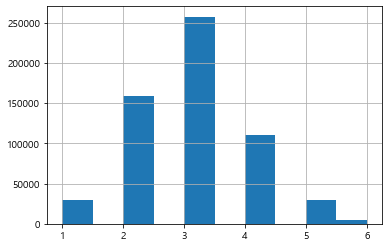

In [57]:
rp_sum['tier'].hist()

In [58]:
squad_df = pd.merge(squad_df, rp_sum, how='left', on='player_name')

In [59]:
squad_df.isnull().sum()

date                         0
game_size                    0
match_id                     0
party_size                   0
player_assists               0
player_dbno                  0
player_dist_ride             0
player_dist_walk             0
player_dmg                   0
player_kills                 0
player_name                  0
player_survive_time          0
team_id                      0
team_placement               0
killed_by              8383203
killer_placement       8383203
killer_position_x      8383203
killer_position_y      8383203
map                          0
time                   8383203
victim_name            8383203
victim_placement       8383203
victim_position_x      8383203
victim_position_y      8383203
kill_distance          8383203
playtime                     0
pubg_scoring                 0
kda                          0
score_sum                    0
tier                         0
dtype: int64

In [62]:
squad_df.columns = ['date', 'game_size', 'match_id', 'party_size', 'player_assists',
       'player_dbno', 'player_dist_ride', 'player_dist_walk', 'player_dmg',
       'player_kills', 'player_name', 'player_survive_time', 'team_id',
       'team_placement', 'killed_by', 'killer_placement', 'killer_position_x',
       'killer_position_y', 'map', 'time', 'victim_name', 'victim_placement',
       'victim_position_x', 'victim_position_y', 'kill_dist', 'num_of_match',
       'pubg_scoring', 'kda', 'score_sum', 'tier']

In [66]:
# anova에 쓸 컬럼만 정리
anova_cols = ['player_assists', 'player_dbno', 'player_kills', 'player_dmg', 'player_dist_ride', 'player_dist_walk',
       'player_survive_time', 'team_placement', 'kill_dist', 'num_of_match', 'kda', 'score_sum', 'tier']

In [67]:
squad_anova = squad_df.groupby(['player_name', 'match_id'])[anova_cols].mean()
squad_anova

player_assists  \
player_name     match_id                                                             
0--kxxk--0      2U4GBNA0Ymk0jRTjC0OgtzXHPY_wqiClwksSiN9QA4pqvDu...               0   
                2U4GBNA0Ymk38ILdnFoIWOUVmjnK92G5_DMemnKEVKQnF98...               0   
                2U4GBNA0Ymk38zTiZlvey3_LcNgXOkz1ughyBrg_5CbJ4Wy...               0   
                2U4GBNA0YmkORyQTZFNT4_hOZRNa-9GPDKI4geLCpL9s8BQ...               0   
                2U4GBNA0YmkOfSRsjDi_hcufNnH5Y0O9_1D_OasdAf1oViO...               0   
...                                                                            ...   
zzzzzzzzzzzzzjy 2U4GBNA0Ymleyf3ZnCcIkH8AUDOYlT2BAWN4_EZsk5h8GoS...               0   
                2U4GBNA0Ymmz-69__Pg9JtKYy8oFmOAJzNah93yJB2Qwn74...               0   
                2U4GBNA0YmnB8c0Ml_4Xi6iISBg47zBAFFa87-edx-2Qg7n...               1   
                2U4GBNA0YmnEr131kCBn78Lm0_nXyRrPaCHas6YOJD8xd48...               0   
                2U4GBNA0Ymnw8MFER_xUI8XoZFUhrr4wB6P9ueTGdHTRWRU...               0   

                                                                    player_dbno  \
player_name     match_id                                                          
0--kxxk--0      2U4GBNA0Ymk0jRTjC0OgtzXHPY_wqiClwksSiN9QA4pqvDu...            2   
                2U4GBNA0Ymk38ILdnFoIWOUVmjnK92G5_DMemnKEVKQnF98...            0   
                2U4GBNA0Ymk38zTiZlvey3_LcNgXOkz1ughyBrg_5CbJ4Wy...            0   
                2U4GBNA0YmkORyQTZFNT4_hOZRNa-9GPDKI4geLCpL9s8BQ...            0   
                2U4GBNA0YmkOfSRsjDi_hcufNnH5Y0O9_1D_OasdAf1oViO...            0   
...                                                                         ...   
zzzzzzzzzzzzzjy 2U4GBNA0Ymleyf3ZnCcIkH8AUDOYlT2BAWN4_EZsk5h8GoS...            2   
                2U4GBNA0Ymmz-69__Pg9JtKYy8oFmOAJzNah93yJB2Qwn74...            0   
                2U4GBNA0YmnB8c0Ml_4Xi6iISBg47zBAFFa87-edx-2Qg7n...            1   
                2U4GBNA0YmnEr131kCBn78Lm0_nXyRrPaCHas6YOJD8xd48...            0   
                2U4GBNA0Ymnw8MFER_xUI8XoZFUhrr4wB6P9ueTGdHTRWRU...            0   

                                                                    player_kills  \
player_name     match_id                                                           
0--kxxk--0      2U4GBNA0Ymk0jRTjC0OgtzXHPY_wqiClwksSiN9QA4pqvDu...             2   
                2U4GBNA0Ymk38ILdnFoIWOUVmjnK92G5_DMemnKEVKQnF98...             0   
                2U4GBNA0Ymk38zTiZlvey3_LcNgXOkz1ughyBrg_5CbJ4Wy...             1   
                2U4GBNA0YmkORyQTZFNT4_hOZRNa-9GPDKI4geLCpL9s8BQ...             0   
                2U4GBNA0YmkOfSRsjDi_hcufNnH5Y0O9_1D_OasdAf1oViO...             0   
...                                                                          ...   
zzzzzzzzzzzzzjy 2U4GBNA0Ymleyf3ZnCcIkH8AUDOYlT2BAWN4_EZsk5h8GoS...             3   
                2U4GBNA0Ymmz-69__Pg9JtKYy8oFmOAJzNah93yJB2Qwn74...             0   
                2U4GBNA0YmnB8c0Ml_4Xi6iISBg47zBAFFa87-edx-2Qg7n...             1   
                2U4GBNA0YmnEr131kCBn78Lm0_nXyRrPaCHas6YOJD8xd48...             0   
                2U4GBNA0Ymnw8MFER_xUI8XoZFUhrr4wB6P9ueTGdHTRWRU...             0   

                                                                    player_dmg  \
player_name     match_id                                                         
0--kxxk--0      2U4GBNA0Ymk0jRTjC0OgtzXHPY_wqiClwksSiN9QA4pqvDu...         255   
                2U4GBNA0Ymk38ILdnFoIWOUVmjnK92G5_DMemnKEVKQnF98...           0   
                2U4GBNA0Ymk38zTiZlvey3_LcNgXOkz1ughyBrg_5CbJ4Wy...         125   
                2U4GBNA0YmkORyQTZFNT4_hOZRNa-9GPDKI4geLCpL9s8BQ...           0   
                2U4GBNA0YmkOfSRsjDi_hcufNnH5Y0O9_1D_OasdAf1oViO...          21   
...                                                                        ...   
zzzzzzzzzzzzzjy 2U4GBNA0Ymleyf3ZnCcIkH8AUDOYlT2BAWN4_EZsk5h8GoS...         196   
                2U4GBNA0Ymmz-69__Pg9Jt

In [68]:
anova_anal_df = squad_anova.groupby('player_name')[anova_cols].mean().reset_index()
anova_anal_df.head()

,player_name,player_assists,player_dbno,player_kills,player_dmg,player_dist_ride,player_dist_walk,player_survive_time,team_placement,kill_dist,num_of_match,kda,score_sum,tier
0,0--kxxk--0,0.204545,0.363636,0.363636,64.136364,1437.606416,1184.901109,855.850159,15.000000,3767.546726,44.000000,0.568182,974.000000,4.000000
1,0-0-Bram,0.333333,1.044444,0.888889,153.777778,1043.089363,2343.452776,1081.692822,11.622222,2825.714355,23.844444,1.222222,1207.000000,4.000000
2,0-0Tiger,0.250000,0.656250,0.437500,91.375000,1689.491183,1278.862434,773.654438,16.187500,1466.603855,32.000000,0.687500,678.000000,4.000000
3,0-0_00_000_0_-0,0.568182,0.818182,1.136364,140.250000,910.449309,987.429789,709.818864,15.659091,2157.803493,44.000000,1.785714,1045.000000,4.000000
4,0-0_Zyjkiller,0.300000,0.900000,0.500000,98.200000,1077.786030,1671.741746,899.816600,12.200000,2742.036136,10.000000,0.800000,254.000000,2.000000


In [69]:
tier_diff_squad = anova_anal_df[['player_kills', 'player_dmg', 'player_assists', 'player_dbno', 'kda', 'player_dist_walk', 'player_dist_ride', 'kill_dist', 'player_survive_time', 'team_placement',  'num_of_match', 'tier']]

In [70]:
# tier_diff_squad.scv 로 저장
tier_diff_squad

,player_kills,player_dmg,player_assists,player_dbno,kda,player_dist_walk,player_dist_ride,kill_dist,player_survive_time,team_placement,num_of_match,tier
0,0.363636,64.136364,0.204545,0.363636,0.568182,1184.901109,1437.606416,3767.546726,855.850159,15.000000,44.000000,4.000000
1,0.888889,153.777778,0.333333,1.044444,1.222222,2343.452776,1043.089363,2825.714355,1081.692822,11.622222,23.844444,4.000000
2,0.437500,91.375000,0.250000,0.656250,0.687500,1278.862434,1689.491183,1466.603855,773.654438,16.187500,32.000000,4.000000
3,1.136364,140.250000,0.568182,0.818182,1.785714,987.429789,910.449309,2157.803493,709.818864,15.659091,44.000000,4.000000
4,0.500000,98.200000,0.300000,0.900000,0.800000,1671.741746,1077.786030,2742.036136,899.816600,12.200000,10.000000,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
591860,0.782609,143.217391,0.347826,0.826087,1.181818,1450.066622,711.881180,4979.374860,836.520000,13.521739,23.000000,3.000000
591861,1.071429,147.142857,0.428571,0.785714,1.500000,657.907517,624.221662,3779.950666,524.615571,19.142857,14.000000,2.000000
591862,0.910714,127.696429,0.303571,0.821429,1.259259,1112.497192,1497.925453,2470.915334,790.874018,14.285714,56.000000,4.000000
591863,0.782609,98.434783,0.478261,0.695652,1.260870,1402.357590,1033.804070,2185.456819,903.522174,14.521739,23.000000,3.000000


# csv 저장

In [1]:
# squad_df.to_csv('pubg/squad_df.csv', index=False)
# anova_anal_df.to_csv('pubg/anova_anal_df.csv', index=False)

In [71]:
tier_diff_squad.to_csv('pubg/tier_diff_squad.csv', index=False)